In [6]:
# Image Depth: Refers to the distance from the camera to various objects in the scene.
# It provides a third dimension to the typical 2D images captured by cameras, which only provide height and width

In [7]:
# Depth Map: A representation of the depth information in an image, typically displayed as a grayscale image where lighter shades represent objects closer to the camera,
# and darker shades represent objects farther away.

In [8]:
# Application:
  # 3D Reconstruction:: used in creating 3D models from photographs, virtual reality environments, and architectural modeling
  # Autonomous Vehicles: self-driving cars use depth information to make real-time decisions about speed, direction, and braking to avoid collisions
  # Robotics: industrial robots use depth sensors to accurately position themselves relative to parts they are assembling or inspecting
  # Object Detection and Segmentation: in augmented reality (AR), knowing the depth allows virtual objects to be placed realistically within a scene, interacting properly with real-world objects

In [9]:
# A disparity map is a key concept in stereo vision, representing the difference in the position of corresponding points between two stereo images (left and right images).
# The disparity map is typically used to estimate the depth of objects in a scene.

In [ ]:
####################################### PIXEL WISE MATCHING #####################################

In [10]:
import cv2
import numpy as np

In [11]:
# L1 distance

def distance (x, y) :
    return abs(x - y)

In [12]:
def pixel_wise_matching(left_img, right_img, disparity_range, save_result = True):

    # Read left , right images then convert to grayscale
    # The stereo images (left_img and right_img) are loaded using OpenCV and converted to grayscale by passing 0 as the second argument to cv2.imread
    left = cv2.imread(left_img, 0)
    right = cv2.imread (right_img, 0)

    # The grayscale images are converted to 'float32' data type
    # algorithm might involve mathematical operations that require floating-point precision
    left = left.astype(np.float32)
    right = right.astype(np.float32)

    # Initialization
      # height and width store the dimensions of the images
    height, width = left.shape[:2]
      # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
      # 'scale' is a factor used to amplify the disparity values for visualization
    scale = 16
      # max_value is set to 255, representing the maximum possible cost (intensity difference) between corresponding pixels
    max_value = 255

    # Pixel-Wise Matching Loop
    # For Each Pixel in the Left Image, we are going to calculate how much we need to shift a pixel to find its corresponding match in the right image.
      # These loops iterate over each pixel (x, y) in the left image
    for y in range(height):
        for x in range(width):

            # Find j where cost has minimum value
            disparity = 0
            cost_min = max_value

            # This loop shifts the pixel in the right image to the left (from its original position) by different amounts called disparity.
            # The goal of this loop is to find the best matching pixel in the right image by trying different shifts (disparities) and calculating the "cost" for each shift.
            for j in range(disparity_range):
                # '(x - j) < 0' checks whether shifting the pixel in the right image by j pixels to the left would move it outside the image bounds.
                  # if the condition is true, meaning the shifted pixel would be outside the image, 'cost = max_value' - the cost is set to a maximum value (255), indicating that this shift is not a valid match.
                  # if it is true, meaning the shifted pixel is within the bounds of the right image, distance(...) is a function (likely computing the absolute difference),
                  # which calculates how different the two pixel values are: cost = |left[y, x] - right[y, x - j]|

                cost = max_value if (x - j) < 0 else distance(int(left[y, x]), int(right[y, x - j]))

                # The goal is to find the disparity j that results in the minimum cost (i.e., the best match) between the pixels in the left and right images.
                # This helps determine how far the pixel in the left image should be shifted to match the corresponding pixel in the right image, which directly relates to the depth of that point in the scene.
                if cost < cost_min:
                  cost_min = cost
                  disparity = j

            # Let depth at (y, x) = j ( disparity )
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale



    if save_result == True:
        print ('Saving result ... ')
        # Save results
        cv2.imwrite(f'pixel_wise_l1.png', depth)
        cv2.imwrite(f'pixel_wise_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

In [ ]:
####################################### PIXEL WISE MATCHING L1 #####################################

In [13]:
def pixel_wise_matching_l1(left_img_path, right_img_path, disparity_range, save_result=True):
    # Read left and right images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create a blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16  # Scale factor for visualization
    max_value = 255  # Maximum possible cost

    for y in range(height):
        for x in range(width):
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                if (x - j) < 0:
                    cost = max_value
                else:
                    cost = distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result ...')
        cv2.imwrite('pixel_wise_l1.png', depth)
        cv2.imwrite('pixel_wise_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth

In [ ]:
####################################### PIXEL WISE MATCHING L2 #####################################

In [14]:
def l2_distance(a, b):
    return (a - b) ** 2

In [15]:
def pixel_wise_matching_l2(left_img_path, right_img_path, disparity_range, save_result=True):
    # Read left and right images and convert to grayscale
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create a blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16  # Scale factor for visualization
    max_value = 255 * 255  # Maximum possible cost for L2

    for y in range(height):
        for x in range(width):
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                if (x - j) < 0:
                    cost = max_value
                else:
                    cost = l2_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result ...')
        cv2.imwrite('pixel_wise_l2.png', depth)
        cv2.imwrite('pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth

In [17]:
left_img_path = '/content/drive/MyDrive/AIO_Colab_Notebooks/MODULE_2/PROJECT_IMAGE_DEPTH/tsukuba/left.png'
right_img_path = '/content/drive/MyDrive/AIO_Colab_Notebooks/MODULE_2/PROJECT_IMAGE_DEPTH/tsukuba/right.png'
disparity_range = 16

pixel_wise_result_l1 = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

# Saving result ...
# Done.

pixel_wise_result_l2 = pixel_wise_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

# Saving result ...
# Done.


Saving result ...
Done.
Saving result ...
Done.


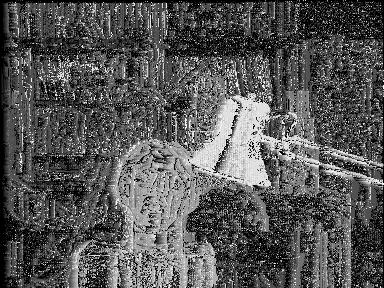

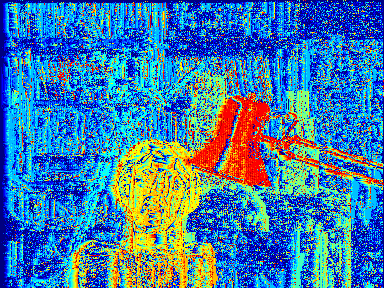

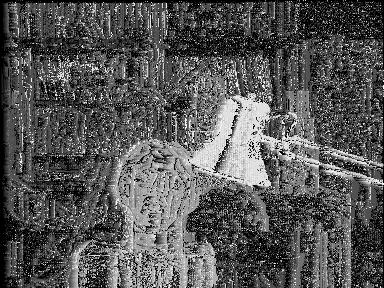

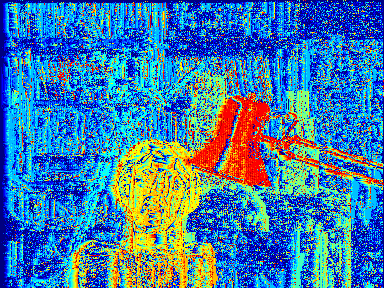

In [22]:
!pip install opencv-python

import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

# Display the grayscale disparity map for L1
cv2_imshow(pixel_wise_result_l1) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(cv2.applyColorMap(pixel_wise_result_l1, cv2.COLORMAP_JET))

# Display the grayscale disparity map for L2
cv2_imshow(pixel_wise_result_l2) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(cv2.applyColorMap(pixel_wise_result_l2, cv2.COLORMAP_JET))

In [ ]:
####################################### WINDOW BASED MATCHING #####################################

In [23]:
import cv2
import numpy as np

In [24]:
def distance(x, y):
    return abs(x - y)

def window_based_matching(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left and right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = distance(
                                int(left[y + v, x + u]),
                                int(right[y + v, (x + u) - j])
                            )
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result ...')
        # Save results
        cv2.imwrite('window_based_l1.png', depth)
        cv2.imwrite('window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth


In [ ]:
####################################### WINDOW BASED MATCHING L1 #####################################

In [25]:
def l1_distance(a, b):
    return abs(a - b)

In [26]:
def window_based_matching_l1(left_img, right_img, disparity_range=64, kernel_size=3, save_result=True):
    # Read left and right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * kernel_size * kernel_size

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparity = 0
            cost_min = max_value * 2  # Use a large initial value for the cost

            for j in range(disparity_range):
                total = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l1_distance(
                                int(left[y + v, x + u]),
                                int(right[y + v, (x + u) - j])
                            )
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result ...')
        cv2.imwrite('window_based_l1.png', depth)
        cv2.imwrite('window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth


In [ ]:
####################################### WINDOW BASED MATCHING L2 #####################################

In [27]:
def l2_distance(a, b):
    return (a - b) ** 2

In [28]:
def window_based_matching_l2(left_img, right_img, disparity_range=64, kernel_size=3, save_result=True):
    # Read left and right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 255 * kernel_size * kernel_size

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparity = 0
            cost_min = max_value * 2  # Use a large initial value for the cost

            for j in range(disparity_range):
                total = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(
                                int(left[y + v, x + u]),
                                int(right[y + v, (x + u) - j])
                            )
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result ...')
        cv2.imwrite('window_based_l2.png', depth)
        cv2.imwrite('window_based_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth


In [30]:
left_img_path = '/content/drive/MyDrive/AIO_Colab_Notebooks/MODULE_2/PROJECT_IMAGE_DEPTH/Aloe/Aloe_left_1.png'
right_img_path = '/content/drive/MyDrive/AIO_Colab_Notebooks/MODULE_2/PROJECT_IMAGE_DEPTH/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

window_based_result_l1 = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

# Saving result ...
# Done.

window_based_result_l2 = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

# Saving result ...
# Done.


Saving result ...
Done.
Saving result ...
Done.


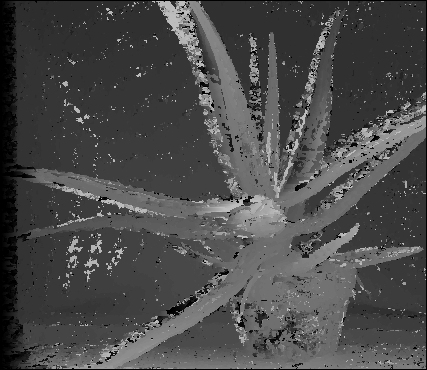

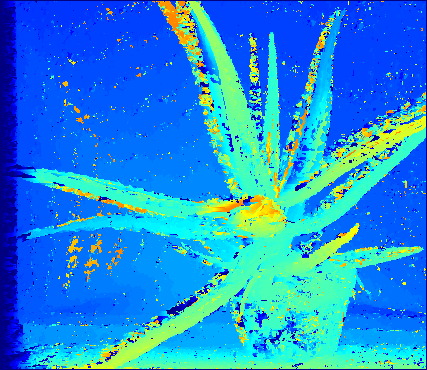

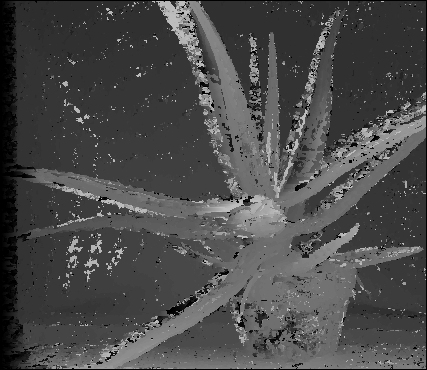

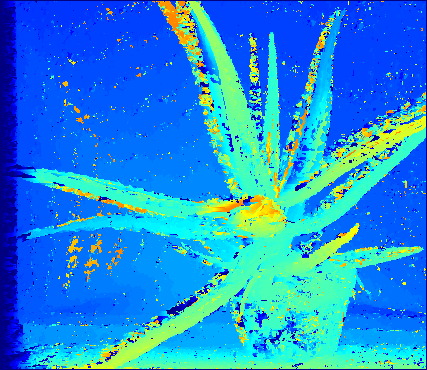

In [31]:
!pip install opencv-python

import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

# Display the grayscale disparity map for WBM L1
cv2_imshow(window_based_result_l1) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(cv2.applyColorMap(window_based_result_l1, cv2.COLORMAP_JET))

# Display the grayscale disparity map for WBM L2
cv2_imshow(window_based_result_l1) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(cv2.applyColorMap(window_based_result_l1, cv2.COLORMAP_JET))

In [ ]:
####################################### WINDOW BASED MATCHING COSINE SIMILARITY #####################################

In [32]:
def cosine_similarity(x, y):
    numerator = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)
    return numerator / denominator

In [33]:
def window_based_matching_cosine(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size - 1) / 2)
    scale = 3

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost has maximum value (since cosine similarity is maximized)
            disparity = 0
            cost_optimal = -1  # Start with the lowest possible cosine similarity

            for j in range(disparity_range):
                d = x - j
                cost = -1
                if (d - kernel_half) > 0:
                    wp = left[(y - kernel_half):(y + kernel_half) + 1, (x - kernel_half):(x + kernel_half) + 1]
                    wqd = right[(y - kernel_half):(y + kernel_half) + 1, (d - kernel_half):(d + kernel_half) + 1]

                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()

                    cost = cosine_similarity(wp_flattened, wqd_flattened)

                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result ...')
        # Save results
        cv2.imwrite('window_based_cosine_similarity.png', depth)
        cv2.imwrite('window_based_cosine_similarity_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth


In [34]:
left_img_path = '/content/drive/MyDrive/AIO_Colab_Notebooks/MODULE_2/PROJECT_IMAGE_DEPTH/Aloe/Aloe_left_1.png'
right_img_path = '/content/drive/MyDrive/AIO_Colab_Notebooks/MODULE_2/PROJECT_IMAGE_DEPTH/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

window_based_result_cosine = window_based_matching_cosine(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

# Saving result ...
# Done.


Saving result ...
Done.


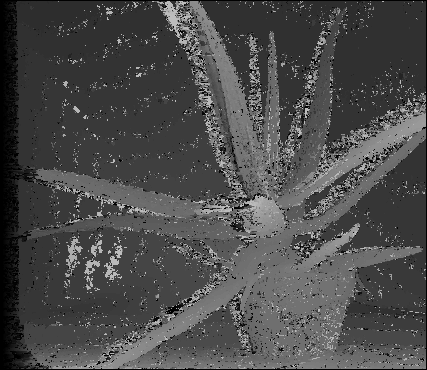

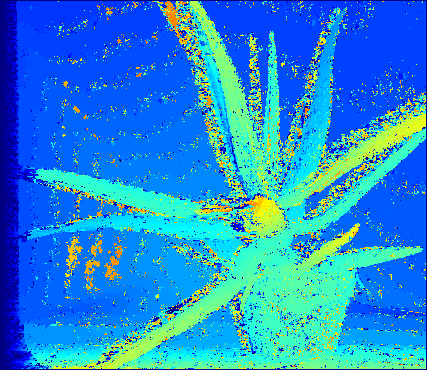

In [35]:
# Display the grayscale disparity map for cosine similarity
cv2_imshow(window_based_result_cosine) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(cv2.applyColorMap(window_based_result_cosine, cv2.COLORMAP_JET))
